In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

In [2]:
df = pd.read_csv('/content/purchase+data.csv')
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
 df.isnull().sum()

,0
ID,0
Day,0
Incidence,0
Brand,0
Quantity,0
Last_Inc_Brand,0
Last_Inc_Quantity,0
Price_1,0
Price_2,0
Price_3,0


In [4]:
#import the segmentation model

scaler = pickle.load(open('/content/scaler.pkl','rb'))
pca = pickle.load(open('/content/pca.pkl','rb'))
kmeans = pickle.load(open('/content/km_pca.pkl','rb'))

In [7]:
#pca
demo_df = df[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
demo_std = scaler.transform(demo_df)
demo_pca = pca.transform(demo_std)

seg = kmeans.predict(demo_pca)


In [8]:
df_predict = df.copy()
df_predict['Segment'] = seg

In [9]:
df_predict.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


**Descriptive Analysis by Segments**

In [10]:
#purchase occations by customer ID
#number of store visit
temp1 = df_predict[['ID','Incidence']].groupby(['ID']).count()
temp1 = temp1.rename(columns={'Incidence':'n_visits'})

#number of purchase
temp2 = df_predict[['ID','Incidence']].groupby(['ID']).sum()
temp2 = temp2.rename(columns={'Incidence':'n_purchases'})

temp3 = temp1.merge(temp2, left_index=True, right_index=True)
temp3['avg_purchases'] = temp3['n_purchases']/temp3['n_visits']
temp3.head()

,n_visits,n_purchases,avg_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [11]:
temp4 = df_predict[['ID','Segment']].groupby(['ID']).mean()
customer_purchase = temp3.merge(temp4,left_index=True,right_index=True)
customer_purchase.head()

,n_visits,n_purchases,avg_purchases,Segment
ID,,,,
200000001,101,9,0.089109,0.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,0.0
200000004,85,11,0.129412,1.0
200000005,111,13,0.117117,0.0


In [12]:
#segment proportion by num of purchase
seg_prop = customer_purchase[['n_purchases','Segment']].groupby('Segment').count()/customer_purchase.shape[0]
seg_prop.rename(columns={'n_purchases':'proportion'},inplace=True)
seg_prop.head()

,proportion
Segment,
0.0,0.290
1.0,0.362
2.0,0.152
3.0,0.196


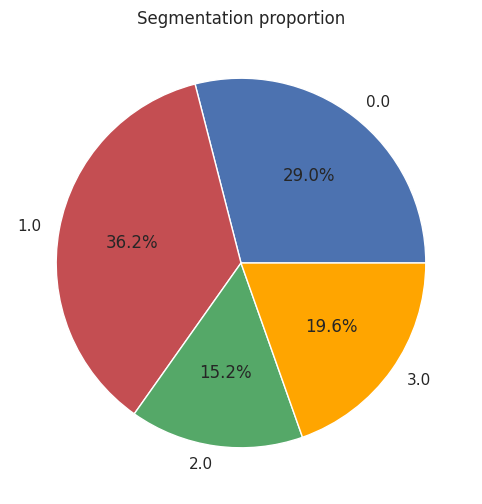

In [14]:
plt.figure(figsize = (8,6))
plt.pie(seg_prop['proportion'],labels=seg_prop.index,autopct='%1.1f%%',colors=('b','r','g','orange'))
plt.title('Segmentation proportion')
plt.show()

**Purchase behavior**

In [15]:
seg_mean = customer_purchase.groupby('Segment').mean()
seg_std = customer_purchase.groupby('Segment').std()

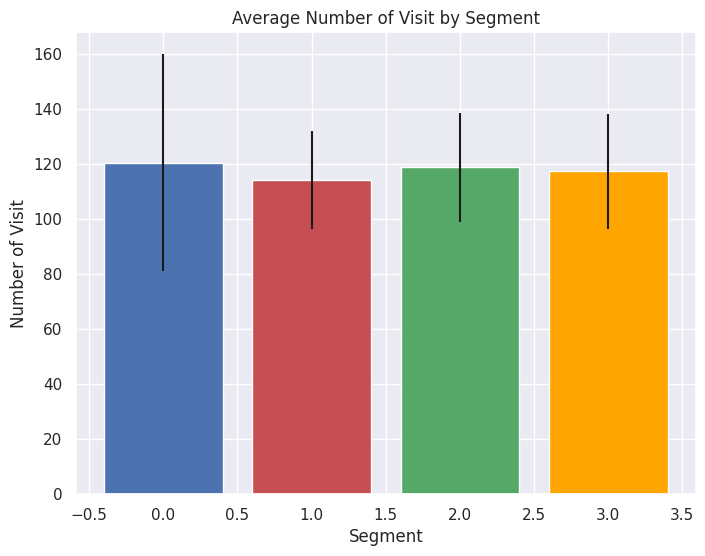

In [16]:
#store visit behavior
plt.figure(figsize=(8,6))
plt.bar(x = (0,1,2,3),
        height=seg_mean['n_visits'],
        yerr=seg_std['n_visits'],
        color=('b','r','g','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Visit')
plt.title('Average Number of Visit by Segment')
plt.show()

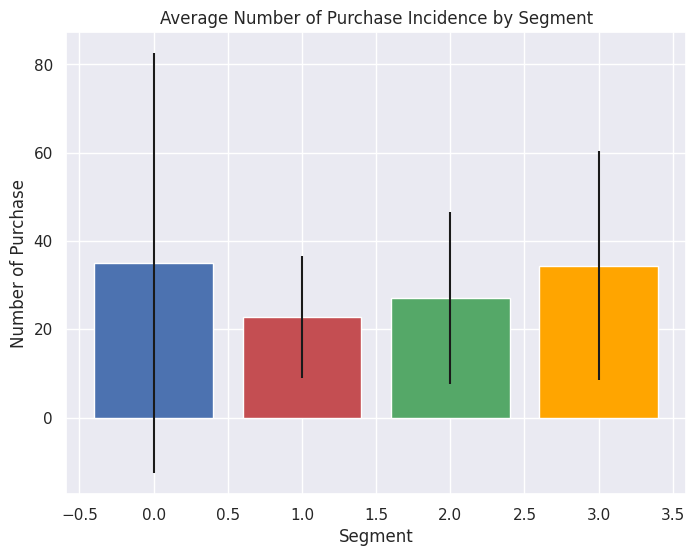

In [17]:
#purchase behavior by segment
plt.figure(figsize=(8,6))
plt.bar(x = (0,1,2,3),
        height=seg_mean['n_purchases'],
        yerr=seg_std['n_purchases'],
        color=('b','r','g','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchase')
plt.title('Average Number of Purchase Incidence by Segment')
plt.show()

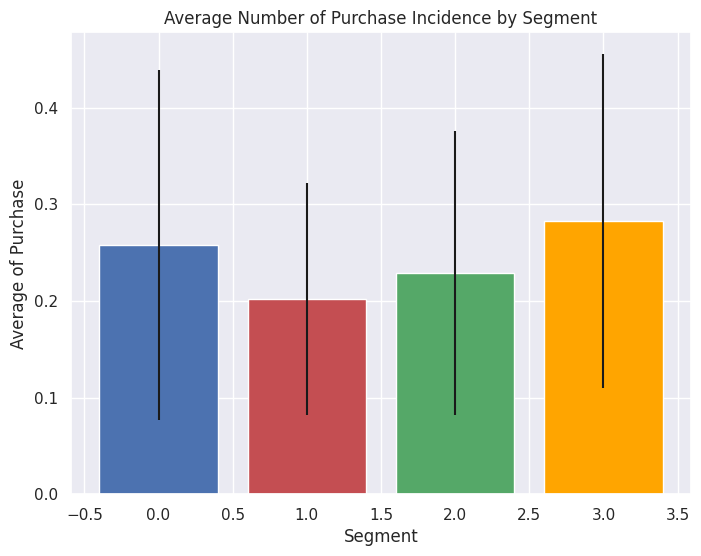

In [18]:
#average purchase by segment
plt.figure(figsize=(8,6))
plt.bar(x = (0,1,2,3),
        height=seg_mean['avg_purchases'],
        yerr=seg_std['avg_purchases'],
        color=('b','r','g','orange'))
plt.xlabel('Segment')
plt.ylabel('Average of Purchase')
plt.title('Average Number of Purchase Incidence by Segment')
plt.show()

Segment 3(well-off) and segment 0(career-focused) are more likely to purchase while career-focused has larger standard deviation

**Brand Analysis**

In [19]:
purchase = df_predict.loc[df_predict['Incidence']==1]

brand_dummies = pd.get_dummies(purchase['Brand'],prefix='brand',prefix_sep='_')
brand_dummies[['Segment','ID']] = purchase[['Segment','ID']]
brand_dummies.head()

,brand_1,brand_2,brand_3,brand_4,brand_5,Segment,ID
6,False,True,False,False,False,0,200000001
11,False,False,False,False,True,0,200000001
19,True,False,False,False,False,0,200000001
24,False,False,False,True,False,0,200000001
29,False,True,False,False,False,0,200000001


In [20]:
temp = brand_dummies.groupby('ID').mean()

brand_choise = temp.groupby('Segment').mean()
brand_choise.head()

,brand_1,brand_2,brand_3,brand_4,brand_5
Segment,,,,,
0.0,0.079019,0.329006,0.029233,0.093493,0.469248
1.0,0.167302,0.597683,0.061925,0.069068,0.104022
2.0,0.232219,0.373984,0.119907,0.077677,0.196212
3.0,0.047030,0.131953,0.029682,0.594854,0.196479


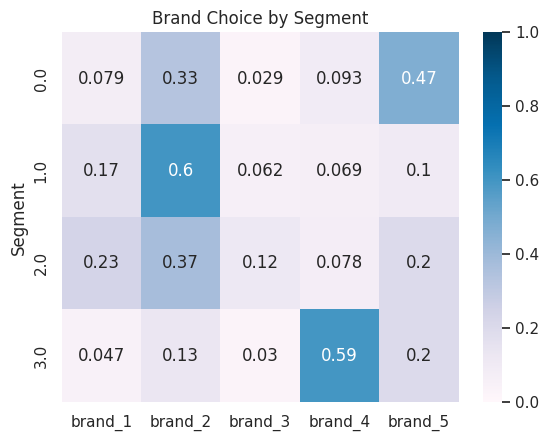

In [21]:
sns.heatmap(brand_choise,
            vmin=0,
            vmax=1, cmap='PuBu',annot=True)
plt.title('Brand Choice by Segment')
plt.show()

career-focused segment 0 tends to choose brand 5 for its high quality while well-off tends to choose brand 4 high quality and also lower price compared with brand 5despite their high income.\
fewer opportunities tend to choose brand 2 for its affordable price.

**Revenue**

In [22]:
brand1 = df_predict[df_predict['Brand']==1]
brand1['revenue'] = brand1['Price_1']*brand1['Quantity']
brand_revenue = pd.DataFrame()
brand_revenue[['Segment','Revenue 1']] = brand1[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue

<ipython-input-22-baab9d6662ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand1['revenue'] = brand1['Price_1']*brand1['Quantity']


,Segment,Revenue 1
0,0,912.12
1,1,2807.51
2,2,1869.77
3,3,716.25


In [23]:
brand2 = df_predict[df_predict['Brand']==2]
brand2['revenue'] = brand2['Price_2']*brand2['Quantity']

temp=brand2[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 2'})
brand_revenue
#

<ipython-input-23-e9422d9b62f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand2['revenue'] = brand2['Price_2']*brand2['Quantity']


,Segment,Revenue 1,Revenue 2
0,0,912.12,5222.99
1,1,2807.51,11742.86
2,2,1869.77,3382.47
3,3,716.25,1419.99


In [24]:
brand3 = df_predict[df_predict['Brand']==3]
brand3['revenue'] = brand3['Price_3']*brand3['Quantity']

temp=brand3[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 3'})

<ipython-input-24-2a4c9ecd0a0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand3['revenue'] = brand3['Price_3']*brand3['Quantity']


In [25]:
brand4 = df_predict[df_predict['Brand']==4]
brand4['revenue'] = brand4['Price_4']*brand4['Quantity']

temp=brand4[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 4'})

<ipython-input-25-aa66498bebee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand4['revenue'] = brand4['Price_4']*brand4['Quantity']


In [26]:
brand5 = df_predict[df_predict['Brand']==5]
brand5['revenue'] = brand5['Price_5']*brand5['Quantity']

temp=brand5[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 5'})

<ipython-input-26-1d1957cec9c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand5['revenue'] = brand5['Price_5']*brand5['Quantity']


In [27]:
brand_revenue.loc[:,'Revenue 1':'Revenue 5']

,Revenue 1,Revenue 2,Revenue 3,Revenue 4,Revenue 5
0,912.12,5222.99,603.79,2268.95,17838.72
1,2807.51,11742.86,2388.88,1910.89,2638.52
2,1869.77,3382.47,2303.31,1165.16,3638.75
3,716.25,1419.99,725.54,13695.10,5505.01


In [28]:
brand_revenue['Total Revenue'] = brand_revenue.loc[:,'Revenue 1':'Revenue 5'].sum(axis=1)
brand_revenue

,Segment,Revenue 1,Revenue 2,Revenue 3,Revenue 4,Revenue 5,Total Revenue
0,0,912.12,5222.99,603.79,2268.95,17838.72,26846.57
1,1,2807.51,11742.86,2388.88,1910.89,2638.52,21488.66
2,2,1869.77,3382.47,2303.31,1165.16,3638.75,12359.46
3,3,716.25,1419.99,725.54,13695.10,5505.01,22061.89


Clearly, career focus contributed to most of the revenue for brand 5 which could be consider as profitable group segment